1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

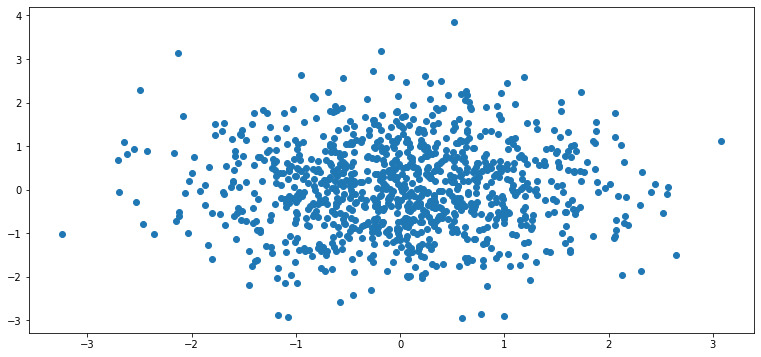

In [3]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, noise=3, coef=True,
                                              random_state=42)
plt.figure(figsize=(13, 6))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [4]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [5]:
data_copy = data.copy()

In [6]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

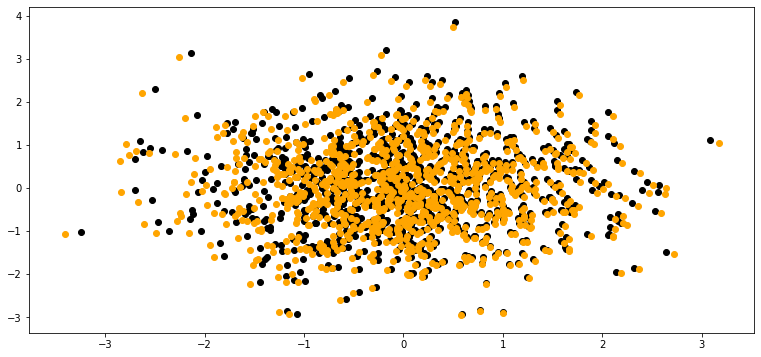

In [7]:
plt.figure(figsize=(13, 6))
plt.scatter(data_copy[:, 0], data_copy[:, 1], c='black')
plt.scatter(data[:, 0], data[:, 1], c='orange')
plt.show()

In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(check_scaler)
#transformed = scaler.transform(check_scaler)

In [9]:
def mean_squared_error(X, W, y_pred):
    y = np.dot(X, W)
    return (sum((y-y_pred)**2)/len(y))

__Gradient Descent__

In [10]:
n = data.shape[0]
w = np.zeros(2)
w_list_GD = [w.copy()]
errors_GD = []
eta = 0.01 #4e-2
max_iter = 1e3
iter_num = 0
np.random.seed(42)
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {w} \n')
new_w = w.copy()
for i in range(int(max_iter)):
    target_pred = np.dot(w, data.T)
    new_w -= eta * (1/n * 2 * np.dot(data.T, (target_pred - target)))    
    w_list_GD.append(new_w.copy())
    errors_GD.append(mean_squared_error(data, new_w, target))
    iter_num += 1
    w = new_w
    
w_list_GD = np.array(w_list_GD)

print(f'GD MSE: {round(errors_GD[-1], 4)}')
print('ITERATIONS:', iter_num)

Number of objects = 1000        
Learning rate = 0.01        
Initial weights = [0. 0.] 

GD MSE: 11.7404
ITERATIONS: 1000


__Stochastic Gradient Descent__

In [11]:
w = np.zeros(2)
w_list_SGD = [w.copy()]
errors_SGD = []
eta = 0.01
max_iter = 1e5
iter_num = 0
np.random.seed(42)
for i in range(int(max_iter)):
    train_ind = np.random.randint(data.shape[0])   
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    w_list_SGD.append(new_w.copy())
    errors_SGD.append(mean_squared_error(data, new_w, target))
    iter_num += 1
    w = new_w

w_list_SGD = np.array(w_list_SGD)

print(f'SGD MSE: {round(errors_SGD[-1], 4)}')
print('ITERATIONS:', iter_num)

SGD MSE: 41.4567
ITERATIONS: 100000


Text(0, 0.5, 'MSE')

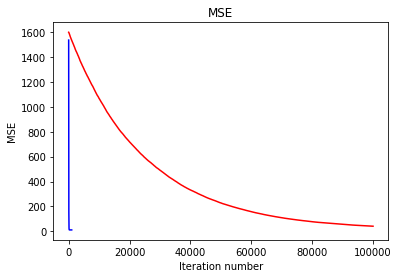

In [12]:
plt.plot(range(len(errors_SGD)), errors_SGD, c='r')
plt.plot(range(len(errors_GD)), errors_GD, c='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

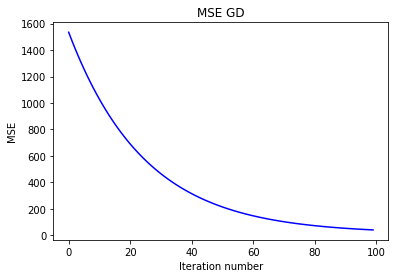

In [13]:
#plt.plot(range(len(errors_SGD)), errors_SGD, c='r')
plt.plot(range(100), errors_GD[:100], c='b')
plt.title('MSE GD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Вывод: классический градиентный спуск сходится несравнимо быстрее. Но, вероятно, на больших данных его вычисление займет значительное время

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

__Stochastic Gradient Descent w/o L2__

In [43]:
from tqdm import tqdm

In [50]:
w = np.zeros(2)
w_list_SGD = [w.copy()]
errors_SGD = []
eta = 0.01
max_iter = 1e4
iter_num = 0
np.random.seed(42)
for i in tqdm(range(int(max_iter))):
    train_ind = np.random.randint(data.shape[0])   
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
    w_list_SGD.append(new_w.copy())
    errors_SGD.append(mean_squared_error(data, new_w, target))
    iter_num += 1
    w = new_w

w_list_SGD = np.array(w_list_SGD)

print(f'SGD MSE: {round(errors_SGD[-1], 4)}')
print('ITERATIONS:', iter_num)

100%|██████████| 10000/10000 [00:01<00:00, 5466.23it/s]

SGD MSE: 1066.5619
ITERATIONS: 10000


In [15]:
def L2(X, W, y_pred, gamma):
    y = np.dot(X, W)
    return (sum((y-y_pred)**2)/len(y) + gamma*np.sum(W**2))

__Stochastic Gradient Descent with L2__

In [51]:
w = np.zeros(2)
w_list_SGDL = [w.copy()]
errors_SGDL = []
eta = 0.01
gamma=0.000015
max_iter = 1e4
iter_num = 0
np.random.seed(42)
for i in tqdm(range(int(max_iter))):
    train_ind = np.random.randint(data.shape[0])
    l2 = gamma*np.sum(w**2)
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0] + np.array([l2, l2])
    w_list_SGDL.append(new_w.copy())
    errors_SGDL.append(mean_squared_error(data, new_w, target))
    iter_num += 1
    w = new_w

w_list_SGDL = np.array(w_list_SGDL)

print(f'SGD MSE: {round(errors_SGDL[-1], 4)}')
print('ITERATIONS:', iter_num)

100%|██████████| 10000/10000 [00:01<00:00, 5070.04it/s]

SGD MSE: 678.5554
ITERATIONS: 10000


Text(0, 0.5, 'MSE')

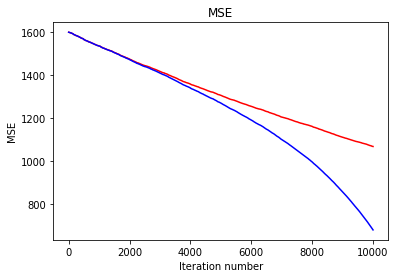

In [52]:
plt.plot(range(len(errors_SGD)), errors_SGD, c='r')
plt.plot(range(len(errors_SGDL)), errors_SGDL, c='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

С регуляризацией стохастический градиентный спуск сходится быстрее чем без нее